# SVMs - Kernel | Linear

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff
from sklearn.model_selection import train_test_split
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# importing accuracy score
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
%matplotlib inline

In [179]:
customer = pd.read_csv("customer.csv")

customer

,age,salary,purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [180]:
X = customer.iloc[:, [0, 1]].values

X[0:5]


array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [181]:
y = customer.iloc[:, 2].values

y[0:5]

array([0, 0, 0, 0, 0])

# Divide into `purchased` and `non-purchased`

**Get the total output data from purchased column**

In [182]:
target_balance = customer["purchased"].value_counts(dropna=False).reset_index()

target_balance

,index,purchased
0,0,257
1,1,143


In [183]:
target_class = go.Bar(
    name = "Target Balance",
    x = ['Not-Purchased', 'purchased'],
    y = target_balance['purchased']
)

fig = go.Figure(target_class)
pyoff.iplot(fig)

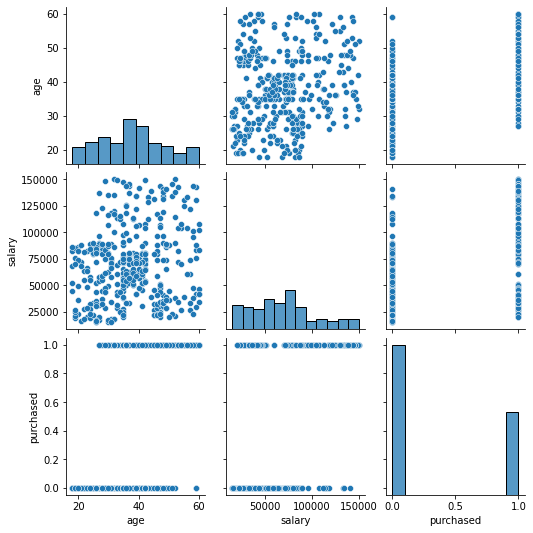

In [184]:
sns.pairplot(customer)

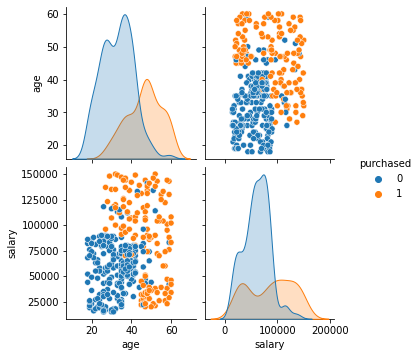

In [185]:
sns.pairplot(customer, hue='purchased')

## Split the data

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## Scale the data

`Scaling:` This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN.

In [187]:
# scalling the input data
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

**Notice that scaling is only applied to the input/independent variables.** Once the scaling is done, our data is then ready to be used to train our model.

### Training model

In [188]:
# set the kernel to linear as it is a `binary` case

classifier = SVC(kernel="linear")

classifier.fit(X_train, y_train)

SVC(kernel='linear')

### Testing the model

In [189]:
y_pred = classifier.predict(X_test)

### Testing the Accuracy

In [190]:
print(accuracy_score(y_test, y_pred))

0.88


## Visualise Trained data

_Linear classifier visualization_

(-2.5825424477554764, 3.3274575522443977)

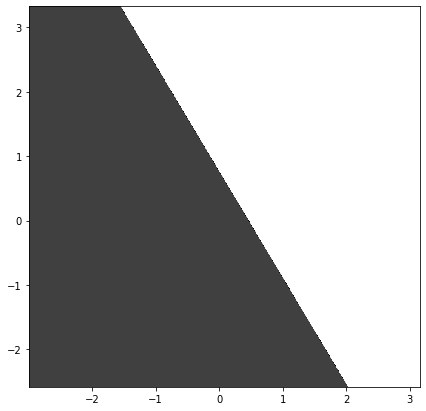

In [191]:
# PLOTTING THE FIGURE

plt.figure(figsize=(7,7))

# Assign the input values

X_set, y_set = X_train, y_train

# ploting the linear graph
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), 
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(
    X1, 
    X2, 
    classifier.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
        alpha = 0.75, 
        cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


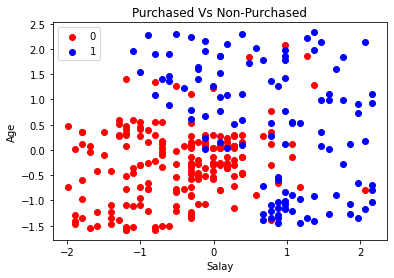

In [192]:
# ploting scattered graph for the values
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

# labeling the graph
plt.title('Purchased Vs Non-Purchased')
plt.xlabel('Salay')
plt.ylabel('Age')
plt.legend()
plt.show()

## Evaluation of SVM algorithm performance for binary classification

A confusion matrix is a summary of prediction results on a classification problem. The correct and incorrect predictions are summarized with count values and broken down by each class. The confusion matrix helps us calculate our model’s accuracy, recall, precision, and f1-score. 

* `Recall:` The ability of a model to find all the relevant cases within a data set. Mathematically, we define recall as the number of true positives divided by the number of true positives plus the number of false negatives.

* `Precision:` the ability of a classification model to return only the data points in a class

* `F1 score:` a single metric that combines recall and precision using the harmonic mean

* `Confusion matrix:` shows the actual and predicted labels from a classification problem

#### Confusion Matrix

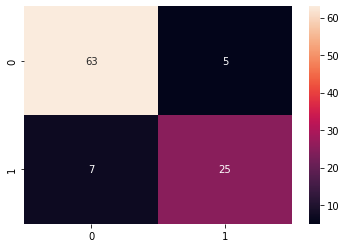

In [193]:
# passing the actual and predicted values

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

sns.heatmap(cm, annot=True)

plt.savefig('confusion.png')

#### Classification report

In [194]:
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

    accuracy                           0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



## SVM algorithm for multiclass classification using Python

In [195]:
dataset = datasets.load_wine()

## Splitting data set

In [196]:
# input and outputs
inputs = dataset.data
outputs = dataset.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

## Training and testing

In [197]:

# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='linear')

# traininf the model
classifier1.fit(X_train,y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9629629629629629
